# Questão 1
Considere o problema de classificação de padrões constituído de duas classes com os seguintes conjuntos de treinamento: $C_{1} = {(0,0,0),(1,0,0),(1,0,1),(1,1,0)}$ e $C_{2}={(0,0,1),(0,1,1),(0,1,0),(1,1,1)}$. Determine o hiperplano de separação dos padrões considerando os seguintes métodos.
* Algoritmo do perceptron
* Máquina de Vetor de Suporte Linear

## Por Perceptron
Um jeito fácil de descobrir o hiperplano de separação é usando uma rede de um único perceptron. Como a entrada é um trio de valores, só há 3 pesos e um viés em toda a rede. A saída y, um valor de 0 a 1, é calculado por: $y = \sigma(w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}+bias)$, sendo $\sigma(x)$ a função de ativação. Os valores de $w_{1}$, $w_{2}$, $w_{3}$ são os pesos, e o $bias$ é o viés. Todos serão calculados pelo algoritmo `Backpropagation`, implementado pela biblioteca python **Keras**, e serão usados para preencher a equação do plano no $R^{3}$: $xw_{1}+yw_{2}+zw_{3}+bias=0$.

### Bibliotecas

In [1]:
import numpy as np
import keras.layers as kl
import keras.models as km
import keras.callbacks as kc
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Dados de treino
Os dados de treino `x_treino` consistem em todos o números representáveis com 3 algarismos na base binária, isto é, de (0,0,0) a (1,1,1).

O gabarito `y_teino` foi escrito na mão seguindo a tabela abaixo:
<table>
  <tl>
      <td>x_treino</td>
      <td>y_treino</td>
  </tl>
  <tr>
    <td>000</td>
    <td>0</td>
  </tr>
  <tr>
    <td>001</td>
    <td>1</td>
  </tr>
  <tr>
    <td>010</td>
    <td>1</td>
  </tr>
  <tr>
    <td>011</td>
    <td>1</td>
  </tr>
  <tr>
    <td>100</td>
    <td>0</td>
  </tr>
  <tr>
    <td>101</td>
    <td>0</td>
  </tr>
  <tr>
    <td>110</td>
    <td>0</td>
  </tr>
  <tr>
    <td>111</td>
    <td>1</td>
  </tr>
</table>

In [2]:
x_treino = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            x_treino.append([i,j,k])
            
y_treino = [0,1,1,1,0,0,0,1]
x_treino = np.array(x_treino)
y_treino = np.array(y_treino).reshape(-1, 1)


### Construindo modelo da rede neural
A rede consiste de um perceptron de 3 entradas e função de ativação sigmoide. A função custo usada é a **Root Mean Squared Logathmic Error**, uma variação do **RMSE** (média quadrática, em português). $$RMSLE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(\log (p_{i}+1)-\log (y_{i}+1))^{2}}$$
$$RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_{i}-p_{i})^{2}} $$

Legenda:
* $y_{i}$ = valor correto
* $p_{i}$ = valor estimado pela rede
* N = tamanho do lote

**OBS.:** Treinamos a rede com 10000 épocas para fins de teste, com metade dessa quantidade já temos um erro próximo de 1% apenas.

In [3]:
model = km.Sequential()  # Entrada
model.add(kl.Dense(1, activation='sigmoid', input_dim=3)) # Primeira camada oculta
model.compile(loss='msle', optimizer='adam')
H = model.fit(x_treino, y_treino, epochs=10000, verbose=0)

### Histórico de erro
O gráfico abaixo mostra a decrescimento do erro conforme o a rede treina seus pesos. Cada ponto corresponde a (época_i, erro_da_época_i).

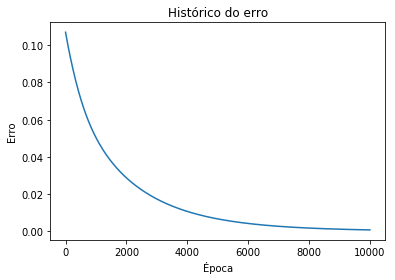

In [7]:
plt.plot(H.history['loss'])
plt.xlabel('Época')
plt.ylabel('Erro')
plt.title('Histórico do erro')
plt.show()

### Visualização do hiperplano


In [11]:
rotulos = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            rotulos.append(model.predict(np.array([[i,j,k]])))

print('Comparando estimações com o gabarito:')
for i in range(len(rotulos)):
    print('Amostra: '+str(x_treino[i])+' - Gabarito: '+str(y_treino[i][0])+' - Estimado: '+str(rotulos[i][0][0]))

param = model.get_weights()
print('\nPesos da rede neural:')
print('w1= '+str(param[0][0][0]))
print('w2= '+str(param[0][1][0]))
print('w3= '+str(param[0][2][0]))

print('viés= '+str(param[1][0]))

Comparando estimações com o gabarito:
Amostra: [0 0 0] - Gabarito: 0 - Estimado: 0.021164028
Amostra: [0 0 1] - Gabarito: 1 - Estimado: 0.93307996
Amostra: [0 1 0] - Gabarito: 1 - Estimado: 0.9358122
Amostra: [0 1 1] - Gabarito: 1 - Estimado: 0.99989367
Amostra: [1 0 0] - Gabarito: 0 - Estimado: 5.7905105e-05
Amostra: [1 0 1] - Gabarito: 0 - Estimado: 0.035999253
Amostra: [1 1 0] - Gabarito: 0 - Estimado: 0.037579753
Amostra: [1 1 1] - Gabarito: 1 - Estimado: 0.96180356

Pesos da rede neural:
w1= -5.9225864
w2= 6.513662
w3= 6.4690537
viés= -3.8340611


O plano retornado foi plotado no geogebra e as imagens com o plano estão neste [álbum](https://imgur.com/a/GEshoXF). Temos algumas observações a fazer:
* O plano encontrado não é a solução ótima.
* Cada treino gera valores diferentes de $w_{1}$, $w_{2}$, $w_{3}$ e $bias$, mas todos geram planos parecidos.
* Foi preciso uma quantidade bem grande de épocas (em torno de 5000) para gerar parâmetros satisfatórios.